In [59]:
# Import libraries
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Authenticate quandl api key
quandl_api_key = "Zmns8n4ypL4kRmFxnsxC"
quandl.ApiConfig.api_key = quandl_api_key

In [48]:
# Data sources: Bank of England, St. Louis FED, United Kingdom Office of National Statistics

In [49]:
# Create dataframe, retrieve UK economic data, merge, and rename columns
df = quandl.get('BOE/XUDLDS6') # USD to GBP, 6-month forward exchange rate
df.rename(columns = {'Value':'fwd_6mo_usd_to_gbp'}, inplace = True)

df = pd.merge(df, quandl.get('BOE/IUDMNIF'), left_index = True, right_index = True) # 10yr nominal implied forward treasury yield, %
df.rename(columns = {'Value':'10yr_treasury_yield'}, inplace = True)

df = pd.merge(df, quandl.get('UKONS/IHYQ_Q'), left_index = True, right_index = True) # QOQ GDP Growth, CVM SA
df.rename(columns = {'Value':'uk_gdp_qoq_cvm_sa_growth_%'}, inplace = True)

df = pd.merge(df, quandl.get('UKONS/ZXDW_Q'), left_index = True, right_index = True) # Quarterly SA UK Unemployment Rate
df.rename(columns = {'Value':'uk_unemployment_sa_%'}, inplace = True)

df = pd.merge(df, quandl.get('OECD/MEI_FIN_IRLT_GBR_Q'), left_index = True, right_index = True) # Quarterly UK Long Term Interest Rate
df.rename(columns = {'Value':'uk_longterm_ir_%'}, inplace = True)

df.head()

,fwd_6mo_usd_to_gbp,10yr_treasury_yield,uk_gdp_qoq_cvm_sa_growth_%,uk_unemployment_sa_%,uk_longterm_ir_%
Date,,,,,
1993-03-31,1.4876,9.1854,0.7,10.4,7.986667
1993-06-30,1.4824,8.5956,0.5,10.2,8.000000
1993-09-30,1.4803,7.6200,0.8,10.1,7.216667
1993-12-31,1.4656,6.7742,0.7,10.1,6.715100
1994-03-31,1.4757,7.5876,1.2,9.8,6.851200


In [50]:
df_ftse = pd.read_csv('data/FTSE_100.csv')

In [51]:
df_ftse.set_index('Date', drop = True, inplace = True)

In [52]:
df_ftse.index = pd.to_datetime(df_ftse.index)

In [53]:
df_ftse.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace = True)

In [54]:
df_ftse.tail()

,Price
Date,
2001-01-09,"6,088.10"
2001-01-08,"6,149.60"
2001-01-05,"6,198.10"
2001-01-04,"6,185.60"
2001-01-03,"6,039.90"


In [55]:
df = pd.merge(df, df_ftse, left_index = True, right_index = True)
df.rename(columns = {'Price':'FTSE_price'}, inplace = True)
df.head()

,fwd_6mo_usd_to_gbp,10yr_treasury_yield,uk_gdp_qoq_cvm_sa_growth_%,uk_unemployment_sa_%,uk_longterm_ir_%,FTSE_price
Date,,,,,,
2001-12-31,1.4406,4.8057,0.4,5.1,4.781734,"5,217.40"
2002-09-30,1.5559,4.5771,0.8,5.2,4.749767,"3,721.80"
2002-12-31,1.5897,4.6323,0.9,5.1,4.606067,"3,940.40"
2003-03-31,1.5626,4.8846,0.7,5.1,4.309100,"3,613.30"
2003-06-30,1.6308,4.8706,0.9,4.9,4.266233,"4,031.20"


In [63]:
df_dependent = df.drop(columns = 'FTSE_price')

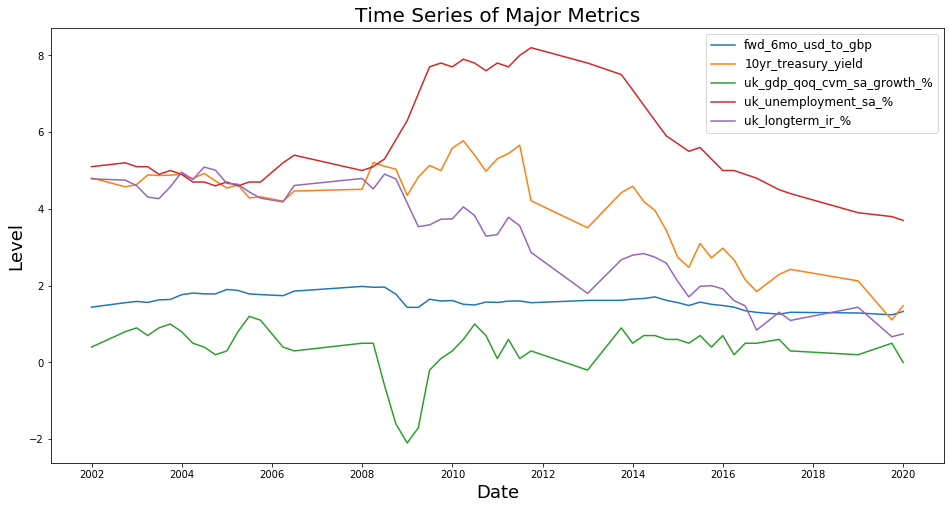

In [64]:
series = list(df_dependent.columns)
fig, ax = plt.subplots(figsize = (16,8))
for series in series:
    x = df.index
    y = df[series]
    ax.plot(x, y, label=series)
ax.legend(fontsize=12)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Level', fontsize=18)
plt.title('Time Series of Major Metrics', fontsize=20)
plt.show()